In [2]:
#必须导入的包
import pandas as pd
import numpy as np

In [3]:
# 图形
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 统计
from scipy import stats
from scipy.stats import skew, norm
from subprocess import check_output
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [5]:
# 分类
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [6]:
# 模型
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

In [32]:
#首先将数据导入
train = pd.read_csv('E:\\学习资料\\大三上\\机器学习\\实验\\beijing.csv', encoding = 'iso-8859-1')
test = pd.read_csv('E:\\学习资料\\大三上\\机器学习\\实验\\test.csv', encoding = 'iso-8859-1')
#combine = [train, test]

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
#可以看到共有255k左右的样本，每个样本有26个属性
print('The data size is : {} '.format(train.shape))

The data size is : (255081, 26) 


In [34]:
print(train.columns.values)

#url网址 #id交易编号 #Lng经度 #Lat纬度 #Cid小区编号

#tradeTime成交时间 #DOM上架时间-从委托出售到成交的时间 #followers关注度 #totalPrice成交总价 #price成交单价 #square面积

#livingRoom卧室数量 #drawingRoom厅数量 #kitchen厨房数量 #bathRoom卫生间数 #floor所在楼层

#buildingType建筑类型，包括塔楼，平房，板塔结合，板楼 #constructionTime建造时间 #renovationCondition装修情况，包括其他，毛坯，简装，精装

#buildingStructure建筑结构类型，包括不确定，混合，砖木，砖混，钢 #ladderRatio户梯比例，电梯数量除以住户数量 #elevator有无电梯

#fiveYearsProperty是否满五年 #subway是否地铁沿线 #district所在行政区 #communityAverage本小区均价

['url' 'id' 'Lng' 'Lat' 'Cid' 'tradeTime' 'DOM' 'followers' 'totalPrice'
 'price' 'square' 'livingRoom' 'drawingRoom' 'kitchen' 'bathRoom' 'floor'
 'buildingType' 'constructionTime' 'renovationCondition'
 'buildingStructure' 'ladderRatio' 'elevator' 'fiveYearsProperty' 'subway'
 'district' 'communityAverage']


In [35]:
#观察数据类型是否有误，'tradeTime','livingRoom','floor',数据类型有错误,需要首先进行处理
train.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                    float64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom              int64
kitchen                  int64
bathRoom               float64
floor                   object
buildingType           float64
constructionTime       float64
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [37]:
train.isnull().sum().sort_values(ascending=False)

DOM                    126313
constructionTime        15522
buildingType             1636
communityAverage          378
subway                     20
fiveYearsProperty          20
elevator                   20
bathRoom                    2
tradetime                   0
tradeTime                   0
followers                   0
Cid                         0
price                       0
Lat                         0
Lng                         0
id                          0
totalPrice                  0
kitchen                     0
square                      0
livingRoom                  0
drawingRoom                 0
floor                       0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
district                    0
url                         0
dtype: int64

In [36]:
#交易时间是年-月-日格式，单独处理
train['tradetime']=train.tradeTime.astype(str).str[0:4]

In [23]:
#去除livingRoom中的异常数值，更改数据类型
train=train.loc[train.livingRoom!='#NAME?',:]
train.livingRoom=train.livingRoom.astype('int64')
train.livingRoom.value_counts()

2    128572
1     65939
3     53964
4      5451
5       890
6       183
7        31
0        23
8         6
9         2
Name: livingRoom, dtype: int64

In [38]:
#统一drawingRoom的数据为整数
train.drawingRoom=train.drawingRoom.astype('int64')

In [42]:
#看一下数据库中历年交易记录数量，发现2016年的交易记录最为齐全
train.tradetime.value_counts()

2016    72647
2015    55820
2017    34611
2013    31001
2012    29769
2014    26092
2011     4822
2018      163
2010      151
2002        2
2008        1
2003        1
2009        1
Name: tradetime, dtype: int64

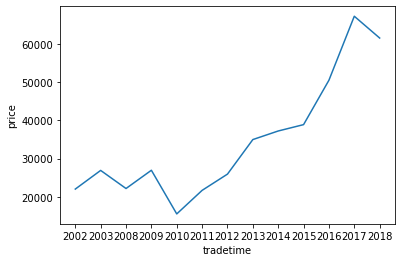

In [40]:
train_year=train.groupby('tradetime').price.mean()
sns.lineplot(data=train_year)

In [29]:
#将floor列中的汉子去除，保留楼层数为整数
train.floor=train.floor.apply(lambda train:train.split()[1])
train.floor=train.floor.astype('int64')

IndexError: list index out of range

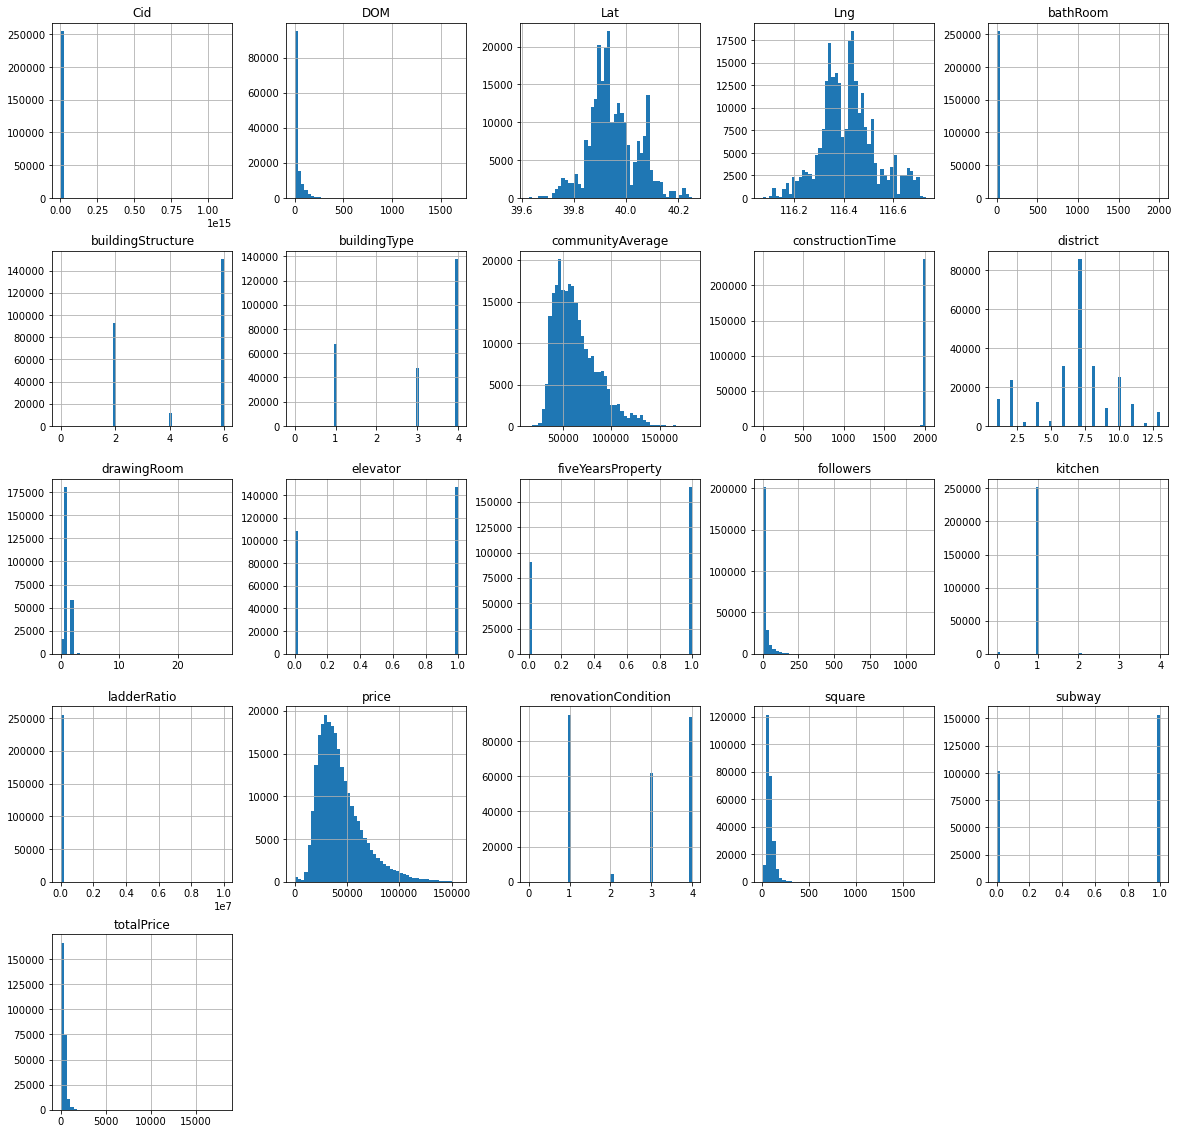

In [17]:
train.hist(bins=50, figsize=(20,20))
plt.show()

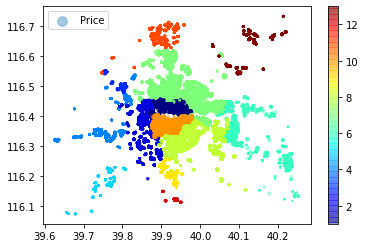

In [11]:
fig = plt.scatter(x=train['Lat'], y=train['Lng'], alpha=0.4, \
    s=train['totalPrice']/100, label='Price', \
    c=train['district'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.legend()
plt.show()

In [16]:
train['followers_band'] = pd.cut(train['followers'], 5)
train[['followers', 'price']].groupby(['followers'], as_index=False).mean().sort_values(by='followers', ascending=True)

,followers,price
0,0,33540.610099
1,1,38257.643420
2,2,39456.961764
3,3,40873.895516
4,4,41120.835485
...,...,...
502,906,39989.000000
503,945,35478.000000
504,1015,78393.000000
505,1085,26667.000000


In [9]:
train.isnull().sum().sort_values(ascending=False)
#DOM（上架时间）                    126313
#buildingType（建筑类型）             1636
#communityAverage（小区均价）          378
#subway（有无地铁）                     20
#fiveYearsProperty（产权）          20
#elevator（电梯）                   20
#DOM缺失过多可以考虑删去

DOM                    126313
constructionTime        15522
buildingType             1636
communityAverage          378
subway                     20
fiveYearsProperty          20
elevator                   20
bathRoom                    2
price                       0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
followers                   0
totalPrice                  0
drawingRoom                 0
square                      0
livingRoom                  0
district                    0
kitchen                     0
floor                       0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
url                         0
dtype: int64

In [10]:
#数据清洗
train = train.drop(['url', 'id', 'Cid', 'Lng', 'Lat', 'DOM'], axis=1)
test = test.drop(['url', 'id', 'Cid', 'Lng', 'Lat', 'DOM'], axis=1)

In [11]:
train.head(5)

,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,2016/8/9,106,415.0,31680,131.00,2,1,1,1.0,26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,2016/7/28,126,575.0,43436,132.38,2,2,1,2.0,22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,2016/12/11,48,1030.0,52021,198.00,3,2,1,3.0,4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,2016/9/30,138,297.5,22202,134.00,3,1,1,1.0,21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,2016/7/22,57,275.6,52000,53.00,1,0,1,1.0,8,4.0,2005.0,3,6,0.333,1.0,1.0,0.0,7,67738.0


In [12]:
print('The data size is : {} '.format(train.shape))

The data size is : (255081, 20) 


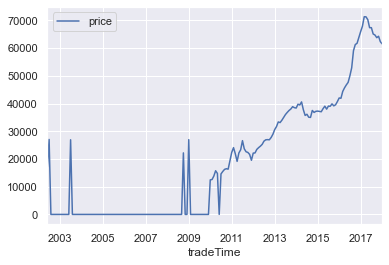

In [55]:
price_by_trade_time = pd.DataFrame()

price_by_trade_time['price'] = train['price']
price_by_trade_time.index = train['tradeTime'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

In [57]:
train['buildingType'] = train['buildingType'].map(lambda x: x if x >= 1 else np.nan)
train['buildingType'].value_counts()
#塔楼1，平房2，板塔3，塔房4

4.0    137909
1.0     67650
3.0     47768
2.0       107
Name: buildingType, dtype: int64

In [58]:
train['floor'].head()

0    26
1    22
2     4
3    21
4     8
Name: floor, dtype: object

In [59]:
train['constructionTime'].value_counts()

2004.0    16930
2003.0    15509
2005.0    15177
2006.0    11843
2007.0    11334
          ...  
1968.0        3
1934.0        2
1944.0        1
1933.0        1
1906.0        1
Name: constructionTime, Length: 72, dtype: int64

In [62]:
def changeconstructionTime(s):
    if len(str(s)) < 4:
        return np.nan
    try:
        return int(s)
    except:
        return np.nan
train['constructionTime'] = train['constructionTime'].map(changeconstructionTime)

In [64]:
def usedTime(buy, build):
    buy = int(buy.split('/')[0])
    try:
        return buy - build
    except:
        np.nan
train['UsedTime'] = train.apply(lambda x: usedTime(x['tradeTime'], x['constructionTime']), axis = 1)

In [65]:
train = train.drop('constructionTime', axis = 1)

In [66]:
train.head(5)

,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,UsedTime
0,2016/8/9,106,415.0,31680,131.00,2,1,1,1.0,26,1.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,11.0
1,2016/7/28,126,575.0,43436,132.38,2,2,1,2.0,22,1.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,12.0
2,2016/12/11,48,1030.0,52021,198.00,3,2,1,3.0,4,4.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,11.0
3,2016/9/30,138,297.5,22202,134.00,3,1,1,1.0,21,1.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,8.0
4,2016/7/22,57,275.6,52000,53.00,1,0,1,1.0,8,4.0,3,6,0.333,1.0,1.0,0.0,7,67738.0,11.0


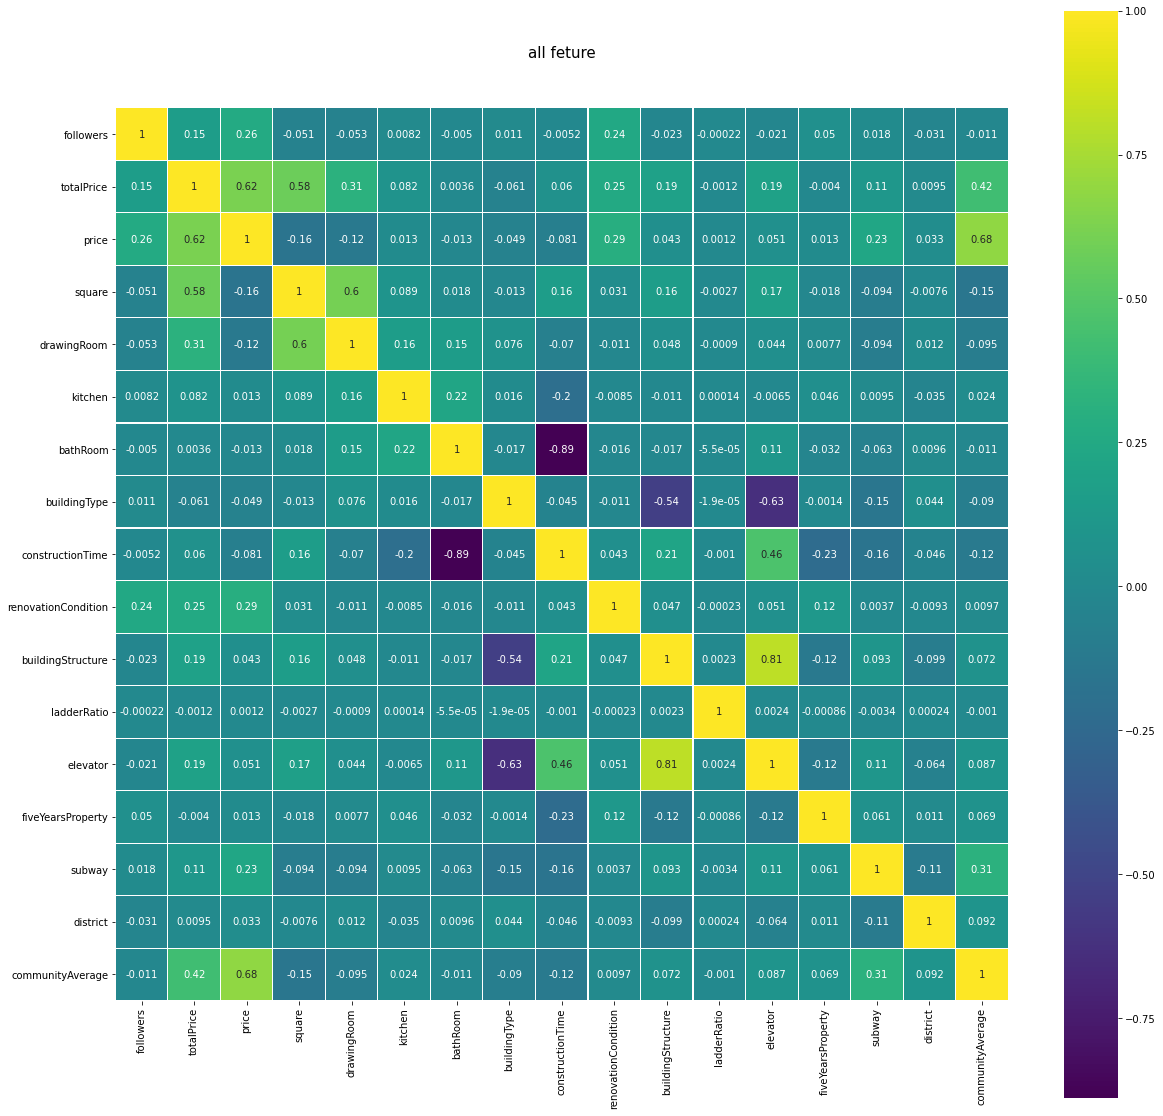

In [41]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('all feture', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
#1,2,4,5,10,15,17

In [ ]:
followers

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


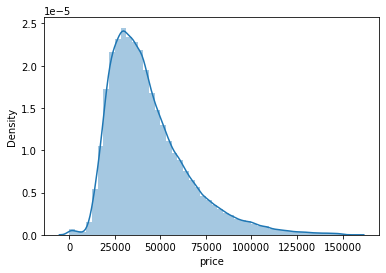

In [32]:
sns.distplot(train['price'])

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
print(train.columns.values)
#'Lng' 'Lat' ,经纬度 
#'Cid' 'tradeTime' 'DOM' 'followers' 'totalPrice' 'price'
# 'square' 'livingRoom' 'drawingRoom' 'kitchen' 'bathRoom' 'floor'
# 'buildingType' 'constructionTime' 'renovationCondition'
#'buildingStructure' 'ladderRatio' 'elevator' 'fiveYearsProperty' 'subway'
# 'district' 'communityAverage'

['Lng' 'Lat' 'Cid' 'tradeTime' 'DOM' 'followers' 'totalPrice' 'price'
 'square' 'livingRoom' 'drawingRoom' 'kitchen' 'bathRoom' 'floor'
 'buildingType' 'constructionTime' 'renovationCondition'
 'buildingStructure' 'ladderRatio' 'elevator' 'fiveYearsProperty' 'subway'
 'district' 'communityAverage']


In [16]:
train.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,255081.000000,255081.000000,2.550810e+05,128768.000000,255081.000000,255081.000000,255081.000000,255081.000000,255081.000000,253445.000000,255081.000000,255081.000000,2.550810e+05,255061.000000,255061.000000,255061.000000,255081.000000,254703.000000
mean,116.418490,39.949560,1.129081e+12,28.762231,16.710692,349.272699,43553.219483,83.240085,0.994512,3.009734,2.606850,4.450625,7.886103e+01,0.576882,0.646065,0.601123,6.763499,63710.215117
std,0.112009,0.091907,2.540388e+12,49.972227,33.871486,232.251724,21746.695682,37.339334,0.109426,1.269872,1.311488,1.901969,2.802742e+04,0.494055,0.478190,0.489668,2.813051,22348.967936
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,14773.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,204.500000,28039.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46352.000000
50%,116.416780,39.934530,1.111027e+12,6.000000,5.000000,294.000000,38739.000000,74.220000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.002450,1.111027e+12,37.000000,18.000000,426.000000,53858.000000,98.720000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [14]:
train.head(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,...,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255081 entries, 0 to 255080
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  255081 non-null  float64
 1   Lat                  255081 non-null  float64
 2   Cid                  255081 non-null  int64  
 3   tradeTime            255081 non-null  object 
 4   DOM                  128768 non-null  float64
 5   followers            255081 non-null  int64  
 6   totalPrice           255081 non-null  float64
 7   price                255081 non-null  int64  
 8   square               255081 non-null  float64
 9   livingRoom           255081 non-null  object 
 10  drawingRoom          255081 non-null  object 
 11  kitchen              255081 non-null  int64  
 12  bathRoom             255081 non-null  object 
 13  floor                255081 non-null  object 
 14  buildingType         253445 non-null  float64
 15  constructionTime 

In [15]:
# 去除无关因素 url, id
train = train.drop(['url', 'id'], axis=1)
test = test.drop(['url', 'id'], axis=1)
combine = [train, test]

train.head()

,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,...,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
